In [65]:
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split

In [87]:
import pandas as pd

# Use the read_excel function for .xlsx files - remove the encoding parameter
df = pd.read_excel('/content/student_skills_languages_dataset_with_approval.xlsx', engine='openpyxl')
df.drop(columns=['Student_ID'], inplace=True)
df = df.applymap(lambda x: x.replace(' months', '') if isinstance(x, str) else x)

df



<ipython-input-87-e14a6d435e02>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' months', '') if isinstance(x, str) else x)


,CGPA,Bachelors_Degree,Skills,Languages,Job_Experience,Duration_of_Internship_or_Job,Extra_Curricular,Research_Paper,Approval_Status
0,3.88,Robotics,"SQL, Artificial Intelligence, Web Development","R, C",Software Developer,13,Music Club,Yes,Accepted
1,2.47,Computer Engineering,"Artificial Intelligence, SQL, Computer Network...",Ruby,Hardware Engineer,4,"Debating Society, Student Government",Yes,Rejected
2,3.72,Mechanical Engineering,"DevOps, SQL, Operating Systems, Cloud Computing","C++, JavaScript",Systems Engineer,16,"Sports Club, Art Club, Student Government",Yes,Accepted
3,3.29,Software Engineering,"PostgreSQL, Operating Systems, Machine Learnin...",R,Systems Engineer,15,"Sports Club, Volunteering",Yes,Accepted
4,3.18,Mechanical Engineering,"Computer Networks, Cloud Computing, PostgreSQL...","C, JavaScript",Network Engineer,15,Music Club,Yes,Accepted
...,...,...,...,...,...,...,...,...,...
6995,3.74,Software Engineering,"Machine Learning, PostgreSQL, Operating System...","C++, C, Ruby",Research Assistant,8,Art Club,Yes,Accepted
6996,3.88,Civil Engineering,"DevOps, PostgreSQL, Operating Systems",C++,Network Engineer,19,"Coding Club, Music Club",Yes,Accepted
6997,4.00,Electrical Engineering,"SQL, DevOps, Data Structures & Algorithms (DSA)","C++, Ruby, Java",Software Developer,21,"Volunteering, Debating Society",No,Accepted
6998,3.09,Computer Engineering,"SQL, Artificial Intelligence, Operating System...","R, C++, C",Data Analyst,18,"Student Government, Debating Society, Voluntee...",No,Accepted


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay


In [118]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas

# Assuming your data is in a DataFrame named 'df'
# If not, replace 'df' with the actual name of your DataFrame
data = pd.DataFrame(df)  # Create a copy of your DataFrame and assign it to 'data'

# Encode categorical columns like 'Bachelors_Degree' and 'Approval_Status'
label_encoder = LabelEncoder()

data['Bachelors_Degree'] = label_encoder.fit_transform(data['Bachelors_Degree'])
data['Approval_Status'] = label_encoder.fit_transform(data['Approval_Status'])
data['Job_Experience'] = label_encoder.fit_transform(data['Job_Experience'])
data['Research_Paper'] = label_encoder.fit_transform(data['Research_Paper'])


In [119]:
skills_dummies = data['Skills'].str.get_dummies(sep=', ')
languages_dummies = data['Languages'].str.get_dummies(sep=', ')
extracur_dummies = data['Extra_Curricular'].str.get_dummies(sep=', ')
# Drop the original 'Skills' and 'Languages' columns and concatenate the new dummy columns
data_encoded = data.drop(columns=['Skills', 'Languages','Extra_Curricular'])
data_encoded = pd.concat([data_encoded, skills_dummies, languages_dummies, extracur_dummies], axis=1)

data_encoded


,CGPA,Bachelors_Degree,Job_Experience,Duration_of_Internship_or_Job,Research_Paper,Approval_Status,Artificial Intelligence,Cloud Computing,Computer Networks,Data Structures & Algorithms (DSA),...,Python,R,Ruby,Art Club,Coding Club,Debating Society,Music Club,Sports Club,Student Government,Volunteering
0,3.88,8,4,13,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2.47,3,1,4,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,3.72,7,5,16,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
3,3.29,9,5,15,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4,3.18,7,2,15,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,3.74,9,3,8,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
6996,3.88,2,2,19,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6997,4.00,5,4,21,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
6998,3.09,3,0,18,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,1


In [120]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['Approval_Status'])
y = data_encoded['Approval_Status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # add random_state for reproducibility

print(X_train.dtypes)







CGPA                                  float64
Bachelors_Degree                        int64
Job_Experience                          int64
Duration_of_Internship_or_Job          object
Research_Paper                          int64
Artificial Intelligence                 int64
Cloud Computing                         int64
Computer Networks                       int64
Data Structures & Algorithms (DSA)      int64
DevOps                                  int64
Machine Learning                        int64
Operating Systems                       int64
PostgreSQL                              int64
SQL                                     int64
Web Development                         int64
C                                       int64
C++                                     int64
Java                                    int64
JavaScript                              int64
Python                                  int64
R                                       int64
Ruby                              

In [121]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [122]:
rf = RandomForestClassifier(random_state=42)  # add random_state for reproducibility
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
y_pred = rf.predict(X_test)

In [124]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9092857142857143


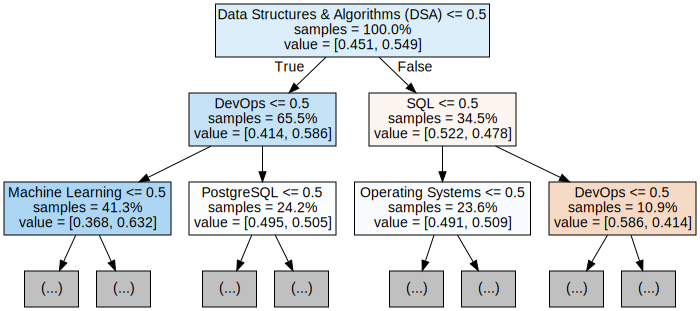

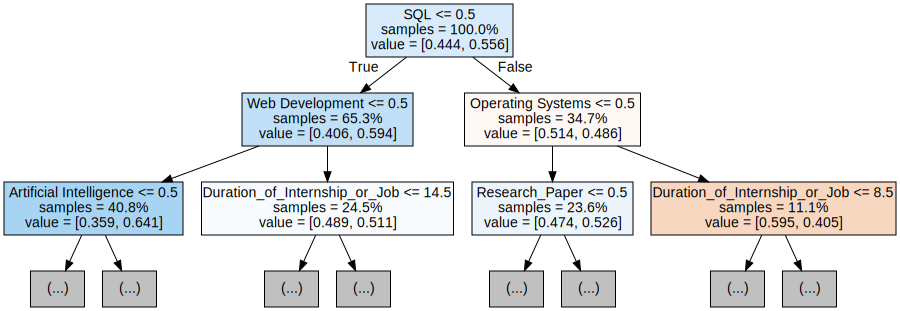

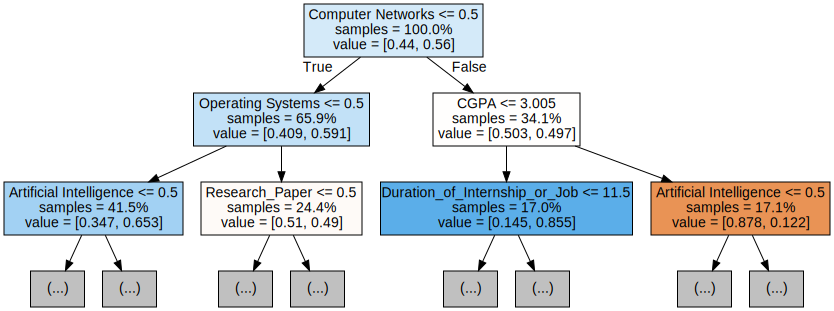

In [125]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [126]:
param_dist = {'n_estimators': randint(1,8),
              'max_depth': randint(1,6999)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ee32e53ca30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ee32e53ff70>})

In [127]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4880, 'n_estimators': 7}


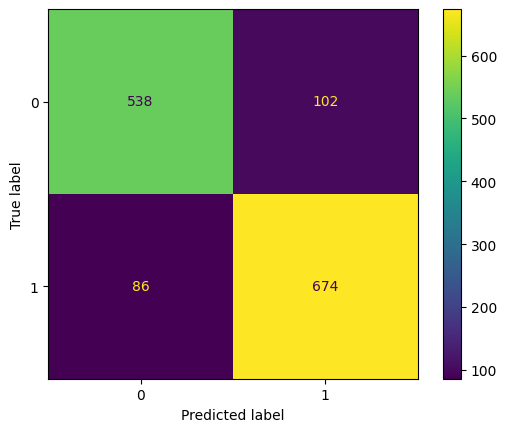

In [128]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [129]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.68
Precision: 0.6741071428571429
Recall: 0.7947368421052632


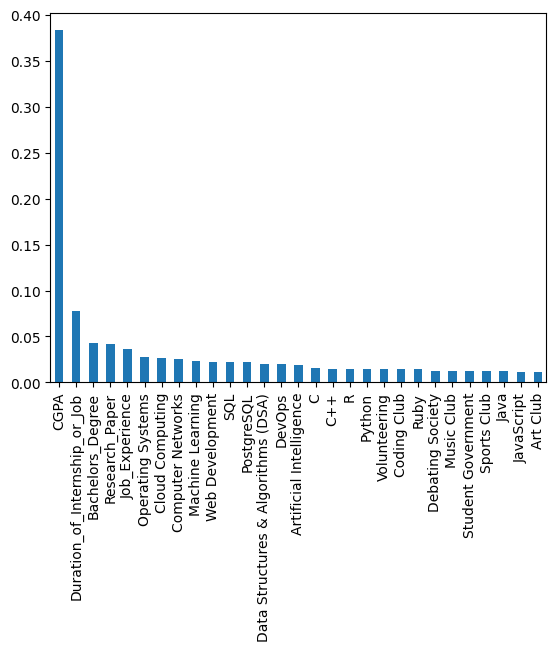

In [130]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();